In [1]:
### KEPLER MULTIS LINEAR REGRESSION
## Written by Sarah Millholland, October 2017

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pdb
import scipy
from scipy import stats
from astropy.io import ascii
import itertools
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [ ]:
### CKS DATA INFORMATION

# List of column names and description. Values with uncertainties are
# given as val + val_err1 - val_err2
id_starname           Unique identifier for star [str]
id_kic                Kepler Input Catalog Name [int]
id_koi                Kepler Object of Interest [int]		
id_koicand            Planet Candidate name K?????.?? [str]
id_tycho2             Tycho-2 identifier [int]
id_kepler_name        Kepler name [str]
tgas_parallax         Tycho-Gaia astrometric solution parallax [mas]
tgas_parallax_err1    
tgas_parallax_err2    
koi_disposition       Exoplanet Archive Disposition [str] 
# Columns from Q16 KOI catalog (Mullally et al. 2015)
koi_period            Orbital Period [days] 
koi_period_err1       Orbital Period Upper Unc. [days]
koi_period_err2       Orbital Period Lower Unc. [days]
koi_time0             Transit Epoch [BJD]
koi_time0_err1        
koi_time0_err2        
koi_impact            Impact Parameter [float]
koi_impact_err1       
koi_impact_err2       
koi_duration          Transit Duration [hrs]
koi_duration_err1     
koi_duration_err2     
koi_ingress           Ingress Duration [hrs]
koi_ingress_err1     
koi_ingress_err2     
koi_depth             Transit Depth [ppm]
koi_depth_err1        
koi_depth_err2        
koi_ror               Planet-Star Radius Ratio [float]
koi_ror_err1          
koi_ror_err2          
koi_srho              Fitted Stellar Density [g/cm**3]
koi_srho_err1         
koi_srho_err2	      
koi_prad              Planetary Radius [Earth radii]
koi_prad_err1         
koi_prad_err2         
koi_sma               Orbit Semi-Major Axis [AU]
koi_sma_err1
koi_sma_err2
koi_teq               Equilibrium Temperature [K]
koi_teq_err1          
koi_teq_err2          
koi_insol             Insolation Flux [Earth flux]
koi_insol_err1        
koi_insol_err2        
koi_dor               Planet-Star Distance over Star Radius [float]
koi_dor_err1          
koi_dor_err2          
koi_max_mult_ev       Maximum Multiple Event Statistic
koi_model_snr         Transit Signal-to-Noise
koi_count             Number of Planets
koi_num_transits      Number of Transits
koi_steff             Stellar Effective Temperature [K]
koi_steff_err1        
koi_steff_err2        
koi_slogg             Stellar Surface Gravity [log10(cm/s**2)]
koi_slogg_err1        
koi_slogg_err2        
koi_smet              Stellar Metallicity [dex]
koi_smet_err1         
koi_smet_err2         
koi_srad              Stellar Radius [Solar radii]
koi_srad_err1         
koi_srad_err2         
koi_smass             Stellar Mass [Solar mass]
koi_smass_err1        
koi_smass_err2        
koi_sage              Stellar Age [Gyr]
koi_sage_err1         
koi_sage_err2         
koi_sparprov          Stellar Parameter Provenance
kic_kepmag            Kepler-band [mag]
kic_jmag              J-band [mag]
kic_hmag              H-band [mag]
kic_kmag              K-band [mag]
# Columns from CKS-I
cks_fpsys	      CKS False positive designation for star/system
cks_fp                CKS False positive designation for candidate
cks_steff             CKS Effective Temperature [K]
cks_steff_err1        
cks_steff_err2        
cks_slogg             CKS Stellar Surface Gravity [log10(cm/s**2)]
cks_slogg_err1        
cks_slogg_err2        
cks_smet              CKS Stellar Metallicity [dex]
cks_smet_err1         
cks_smet_err2         
cks_svsini            CKS Projected Stellar Rotational Velocity [km/s]
cks_svsini_err1       
cks_svsini_err2       
# Columns from CKS-II
iso_steff             CKS+Isochrone-constrained Effective Temperature [K]
iso_steff_err1 	      
iso_steff_err2 	      
iso_slogg             CKS+Isochrone-constrained Stellar Surface Gravity [log10(cm/s**2)]
iso_slogg_err1 	      
iso_slogg_err2 	      
iso_smet              CKS+Isochrone-constrained Stellar Metallicity [dex]
iso_smet_err1 	      
iso_smet_err2 	      
iso_srad              CKS+Isochrone-constrained Stellar Radius [Solar radii]
iso_srad_err1 	      
iso_srad_err2 	      
iso_smass             CKS+Isochrone-constrained Stellar Mass [Solar mass]
iso_smass_err1 	      
iso_smass_err2	      
iso_sage              CKS+Isochrone-constrained Stellar Age [Gyr]
iso_sage_err1
iso_sage_err2	      
iso_slogage           CKS+Isochrone-constrained Stellar Age [log10(yrs)]
iso_slogage_err1	      
iso_slogage_err2	      
iso_sparallax         CKS+Isochrone-constrained Stellar parallax [mas]
iso_sparallax_err1    
iso_sparallax_err2    
iso_prad              CKS+Isochrone-constrained Planet Radius [Earth radii]
iso_prad_err1	      
iso_prad_err2	      
iso_sma               CKS+Isochrone-constrained semi-major axis [AU]
iso_sma_err1
iso_sma_err2
iso_insol             CKS+Isochrone-constrained Incident flux [Earth units]
iso_insol_err1	      
iso_insol_err2	      
iso_teq               CKS+Isochrone-constrained Planet equilibrium temperature (bond albedo = 0.3)
iso_teq_err1	      
iso_teq_err2	      

In [ ]:
### FURLAN ET AL. TABLE 9 INFORMATION

Title: The Kepler Follow-Up Observation Program. I. A Catalog of Companions 
       to Kepler Stars from High-Resolution Imaging  
Authors: Furlan E., Ciardi D.R., Everett M.E., Saylors M., Teske J.K., 
    Horch E.P., Howell S.B., van Belle G.T., Hirsch L.A., Gautier, III T.N., 
    Adams E.R., Barrado D., Cartier K.M.S., Dressing C.D., Dupree A.K., 
    Gilliland R.L., Lillo-Box J., Lucas P.W., Wang J. 
Table: Planet Radius Correction Factors Assuming Planets Orbit the Primary 
    Stars, Derived from dmag Measurements in Various Bands, and Weighted Average
================================================================================
Byte-by-byte Description of file: ajaa52c1t9_mrt.txt
--------------------------------------------------------------------------------
   Bytes Format Units   Label       Explanations
--------------------------------------------------------------------------------
   1-  4 I4      ---    KOI         Kepler Object of Interest number
   6- 12 F7.5    ---    PRCF-HST    ?=0.00000 Planet Radius Correction Factor, dmag, F555W,F775W (1)
  14- 22 E9.3    ---  e_PRCF-HST    ?=0.000E+00 Uncertainty in PRCF-HST
  24- 30 F7.5    ---    PRCF-i'     ?=0.00000 Planet Radius Correction Factor, dmag-i' (1)
  32- 40 E9.3    ---  e_PRCF-i'     ?=0.000E+00 Uncertainty in PRCF-i'
  42- 48 F7.5    ---    PRCF-692nm  ?=0.00000 Planet Radius Correction Factor, dmag-692nm (1)
  50- 58 E9.3    ---  e_PRCF-692nm  ?=0.000E+00 Uncertainty in PRCF-692nm
  60- 66 F7.5    ---    PRCF-LP600  ?=0.00000 Planet Radius Correction Factor, dmag-LP600 (1)
  68- 76 E9.3    ---  e_PRCF-LP600  ?=0.000E+00 Uncertainty in PRCF-LP600
  78- 84 F7.5    ---    PRCF-J      ?=0.00000 Planet Radius Correction Factor, dmag-J (1)
  86- 94 E9.3    ---  e_PRCF-J      ?=0.000E+00 Uncertainty in PRCF-J
  96-102 F7.5    ---    PRCF-K      ?=0.00000 Planet Radius Correction Factor, dmag-K (1)
 104-112 E9.3   ---   e_PRCF-K      ?=0.000E+00 Uncertainty in PRCF-K
 114-120 F7.5   ---     PRCF-JK1    ?=0.00000 Planet Radius Correction Factor, J-K (dwarf) (1)
 122-130 E9.3   ---   e_PRCF-JK1    ?=0.000E+00 Uncertainty in PRCF-JK1
 132-138 F7.5   ---     PRCF-JK2    ?=0.00000 Planet Radius Correction Factor, J-K (giant) (1)
 140-148 E9.3   ---   e_PRCF-JK2    ?=0.000E+00 Uncertainty in PRCF-JK2
 150-155 F6.4   ---     PRCF-avg    ?=0.00000 Weighted average of the correction factors
 157-162 F6.4   ---   e_PRCF-avg    ?=0.000E+00 Uncertainty in PRCF-avg
--------------------------------------------------------------------------------
Note (1): Radius correction factors calculated as shown in Equation 5, derived 
    from dmag measurements in different bands converted to dmag-Kp values,
    see text.
--------------------------------------------------------------------------------

In [3]:
##---------------------------------

## READ FURLAN ET AL. (2017) TABLE 9
filename = 'Furlan_2017_data'
table = np.genfromtxt(filename, skip_header = 37)
Furlan_KOI_number = table[:,0]
Furlan_dilution_factor = table[:,-2]

##---------------------------------

## READ CKS DATA
filename = 'cks_physical_merged.csv'
table = np.genfromtxt(filename, delimiter = ',', names = True, dtype = None)

def Find_Multis(table, min_num_pl):
    ## FIND THE MULTIPLE-PLANET SYSTEMS IN THE CKS TABLE
    KOI_names_CKS = table['id_koicand']

    ## GET THE INDICES OF EACH SYSTEM
    num_pl = len(table)
    sys_id = []
    index = 0
    sys_id.append(index)
    sys_i = KOI_names_CKS[0].split('.')[0]
    for i in range(num_pl-1):
        sys_ip1 = KOI_names_CKS[i+1].split('.')[0]
        if sys_ip1 == sys_i:
            sys_id.append(index)
        else:
            index = index + 1
            sys_id.append(index)
        sys_i = sys_ip1
    sys_id = np.array(sys_id)


    ## FIND MULTIS
    multi_indices = np.array([])
    uniq_sys_id, uniq_indices = np.unique(sys_id, return_index = True)
    num_sys = len(uniq_sys_id)
    for i in range(num_sys):
        indices = np.where(sys_id == uniq_sys_id[i])[0]
        if len(indices) >= min_num_pl:
            multi_indices = np.concatenate((multi_indices, indices))
    multi_indices = multi_indices.astype('int')
    table = table[multi_indices]
    
    return table


## APPLY THE SAME CUTS AS WEISS ET AL. (2017)

min_num_pl = 3   ## Minimum number of planets in the multis 

## FIND MULTIS
table = Find_Multis(table, min_num_pl)
print 'all multis: ', len(table)
            
## REMOVE FALSE POSITIVES
table = table[np.where(table['cks_fp'] == 0)[0]]
print 'remove FPs: ', len(table)

## REMOVE STARS WITH DILUTION FACTORS REATER THAN 5%
good_indices = []
for i in range(len(table)):
    KOI_num = table['id_koicand'][i]
    KOI_num = int(KOI_num.split('K')[1].split('.')[0])
    index_Furlan_table = np.where(Furlan_KOI_number == KOI_num)[0]
    if len(index_Furlan_table) == 0:
        good_indices.append(i)
    else:
        if Furlan_dilution_factor[index_Furlan_table]  < 1.05:
            good_indices.append(i)
table = table[good_indices]
print 'remove diluted stars: ', len(table)

## REMOVE CANDIDATES FOR WHICH IMPACT PARAMETER IS GREATER THAN 0.9
table = table[np.where(table['koi_impact'] < 0.9)[0]]
print 'remove KOIs with b > 0.9: ', len(table)

## REMOVE CANDIDATES WITH SNR < 10
table = table[np.where(table['koi_model_snr'] > 10)[0]]
print 'remove KOIs with SNR < 10: ', len(table)

## FIND MULTIS AGAIN
table = Find_Multis(table, min_num_pl)
print 'all multis round 2: ', len(table)


## GET THE INDICES OF EACH SYSTEM
KOI_names_CKS = table['id_koicand']
num_pl = len(table)
sys_id = []
index = 0
sys_id.append(index)
sys_i = KOI_names_CKS[0].split('.')[0]
for i in range(num_pl-1):
    sys_ip1 = KOI_names_CKS[i+1].split('.')[0]
    if sys_ip1 == sys_i:
        sys_id.append(index)
    else:
        index = index + 1
        sys_id.append(index)
    sys_i = sys_ip1
sys_id = np.array(sys_id)
uniq_sys_id, uniq_indices = np.unique(sys_id, return_index = True)
num_sys = len(uniq_sys_id)
print 'num sys: ', num_sys



all multis:  639
remove FPs:  617
remove diluted stars:  584
remove KOIs with b > 0.9:  548
remove KOIs with SNR < 10:  530
all multis round 2:  454
num sys:  128


In [4]:
## MULTIVARIATE REGRESSION

## POSSIBLE INDEPENDENT VARIABLES
Mstar = table['iso_smass']
Rstar = table['iso_srad']
Teff = table['iso_steff']
FeH = table['iso_smet']
logg = table['cks_slogg']
vsini = table['cks_svsini']
star_age = table['iso_slogage']


## POSSIBLE DEPENDENT VARIABLES
Rp = table['iso_prad']
Rp_low = np.abs(table['iso_prad_err2'])
Rp_high = table['iso_prad_err1']
a = table['iso_sma']
Teq = table['iso_teq']
flux = table['iso_insol']

num_pert = 1000

#
sys_Mstar = np.zeros(num_sys)
sys_Rstar = np.zeros(num_sys)
sys_Teff = np.zeros(num_sys)
sys_FeH = np.zeros(num_sys)
sys_logg = np.zeros(num_sys)
sys_vsini = np.zeros(num_sys)
sys_star_age = np.zeros(num_sys)
#
median_Rp = np.zeros(num_sys)
min_Rp = np.zeros(num_sys)

max_Rp = np.zeros(num_sys)
CV_Rp = np.zeros(num_sys)
CV_Rp_rand = np.zeros((num_sys, num_pert))
median_a = np.zeros(num_sys)
min_a = np.zeros(num_sys)
max_Teq = np.zeros(num_sys)
max_flux = np.zeros(num_sys)
sys_num_pl = np.zeros(num_sys)

num_2pl = 0
num_3pl = 0
num_4pl = 0
num_5pl = 0
num_6pl = 0

## LOOP THROUGH SYSTEMS
for i in range(num_sys):
    indices = np.where(sys_id == uniq_sys_id[i])[0]
    if len(indices) == 2: num_2pl += 1
    elif len(indices) == 3: num_3pl += 1
    elif len(indices) == 4: num_4pl += 1
    elif len(indices) == 5: num_5pl += 1
    elif len(indices) == 6: num_6pl += 1
    
    Rp_i = Rp[indices]
    median_Rp[i] = np.median(Rp_i)
    max_Rp[i] = np.max(Rp_i)
    CV_Rp[i] = np.std(Rp_i)/np.mean(Rp_i)
    a_i = a[indices]
    median_a[i] = np.median(a_i)
    min_a[i] = np.min(a_i)
    Teq_i = Teq[indices]   
    max_Teq[i] = np.max(Teq_i)
    flux_i = flux[indices]
    max_flux[i] = np.max(flux_i)
    sys_num_pl[i] = len(indices)
    #
    sys_Mstar[i] = Mstar[indices[0]]
    sys_Rstar[i] = Rstar[indices[0]]
    sys_Teff[i] = Teff[indices[0]]
    sys_FeH[i] = FeH[indices[0]]
    sys_logg[i] = logg[indices[0]]
    sys_vsini[i] = vsini[indices[0]]
    sys_star_age[i] = star_age[indices[0]]
    
    ## LOOP THROUGH RANDOM TRIALS
    for j in range(num_pert):
        rand_indices = np.random.choice(np.arange(num_pl), size = len(indices))  
        # Rp
        CV_Rp_rand[i,j] = np.std(Rp[rand_indices])/np.mean(Rp[rand_indices])

        
CV_Rp_rand = np.median(CV_Rp_rand, axis = 1)
    
    
## PICK INDEPENDENT AND DEPENDENT VARIABLES
## Independent variables
x = np.array([sys_FeH, sys_Mstar]).T

## Dependent variable
dep_variable = 'min_a'

if dep_variable == 'min_a':
    y = np.array([min_a]).T
    old_len_x = len(x)
    x = x[np.where(y < 0.15)[0]]
    y = y[np.where(y < 0.15)[0]]
    print 'number of outliers = ', old_len_x - len(x) 
elif dep_variable == 'max_Teq':
    y = np.array([max_Teq]).T
elif dep_variable == 'median_Rp':
    y = np.array([median_Rp]).T
    old_len_x = len(x)
    x = x[np.where(y < 5)[0]]
    y = y[np.where(y < 5)[0]]
    print 'number of outliers = ', old_len_x - len(x) 
elif dep_variable == 'CV_Rp/CV_Rp_rand':
    y = np.array([CV_Rp/CV_Rp_rand]).T
    old_len_x = len(x)
    x = x[np.where(y < 2.)[0]]
    y = y[np.where(y < 2.)[0]]
    print 'number of outliers = ', old_len_x - len(x) 

## SCIKIT-LEARN MULTIPLE REGRESSION
lm = linear_model.LinearRegression()
model = lm.fit(x, y)
print 'R^2 = ', lm.score(x, y)
print 'coeff1, coeff2 = ', lm.coef_

## STATSMODELS MULTIPLE REGRESSION
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

number of outliers =  3
R^2 =  0.219672187407
coeff1, coeff2 =  [[-0.05727743  0.06895988]]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     17.17
Date:                Mon, 16 Oct 2017   Prob (F-statistic):           2.68e-07
Time:                        18:02:01   Log-Likelihood:                 303.83
No. Observations:                 125   AIC:                            -601.7
Df Residuals:                     122   BIC:                            -593.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0084      0.014     -0.618      0.537      -0.035       0.019
x1            -0.0573      0.011     -4.993      0.000      -0.080      -0.035
x2             0.0690      0.014      4.935      0.000       0.041       0.097
==============================================================================
Omnibus:                        5.207   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                4.902
Skew:                           0.482   Prob(JB):                       0.0862
Kurtosis:                       3.107   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


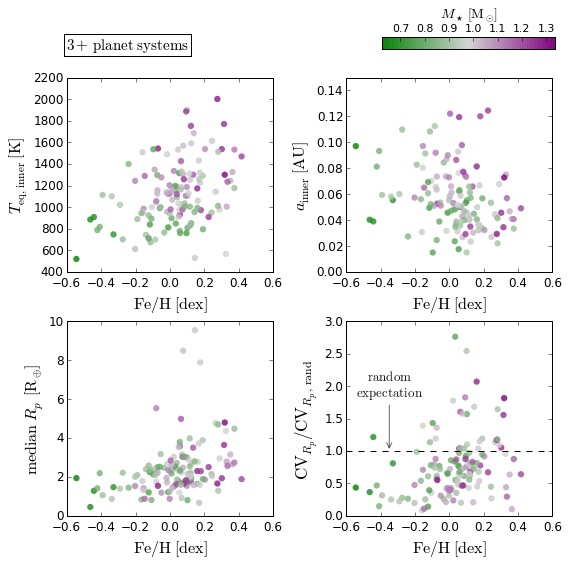

In [5]:
fig = plt.figure(figsize = (8, 8))
cmap = LinearSegmentedColormap.from_list('mycmap', ['green', 'lightgray', 'purple'])

ax = fig.add_subplot(221)
plt.scatter(sys_FeH, max_Teq, c = sys_Mstar, s = 40, alpha = 0.8, edgecolors = 'none', cmap = cmap)

plt.xlim(-0.6, 0.6)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

plt.xlabel(r'$\mathrm{Fe/H \ [dex]}$', fontsize = 16)
plt.ylabel(r'$T_{\mathrm{eq}, \ \mathrm{inner}} \ \mathrm{[K]}$', fontsize = 16)

plt.text(-0.25, 2500, r'$\mathrm{3+ \ planet \ systems}$', \
         horizontalalignment = 'center', verticalalignment = 'center', \
         bbox=dict(facecolor='white', edgecolor='black'), fontsize = 15)

###
ax = fig.add_subplot(222)
plot = plt.scatter(sys_FeH, min_a, c = sys_Mstar, s = 40, alpha = 0.8, edgecolors = 'none', cmap = cmap)

plt.xlim(-0.6, 0.6)
plt.ylim(0, 0.15)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

plt.xlabel(r'$\mathrm{Fe/H \ [dex]}$', fontsize = 16)
plt.ylabel(r'$a_{\mathrm{inner}} \ \mathrm{[AU]}$', fontsize = 16)


###
ax = fig.add_subplot(223)
plt.scatter(sys_FeH, median_Rp, c = sys_Mstar, s = 40, alpha = 0.8, edgecolors = 'none', cmap = cmap)

plt.xlim(-0.6, 0.6)
plt.ylim(0, 10)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

plt.xlabel(r'$\mathrm{Fe/H \ [dex]}$', fontsize = 16)
plt.ylabel(r'$\mathrm{median} \ R_p \ \mathrm{[R_{\oplus}]}$', fontsize = 16)

###
ax = fig.add_subplot(224)
plt.scatter(sys_FeH, CV_Rp/CV_Rp_rand, c = sys_Mstar, s = 40, alpha = 0.8, edgecolors = 'none', cmap = cmap)
plt.axhline(1, color = 'k', linestyle = 'dashed')

plt.xlim(-0.6, 0.6)
plt.ylim(0, 3)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

plt.xlabel(r'$\mathrm{Fe/H \ [dex]}$', fontsize = 16)
plt.ylabel(r'$\mathrm{CV}_{R_p}/\mathrm{CV}_{R_p, \ \mathrm{rand}}$', fontsize = 17)

ax.annotate(r'$\mathrm{random}$' + '\n' + r'$\mathrm{expectation}$', color = 'k', alpha = 0.9,\
            fontsize = 13, xy=(-0.35, 1), xycoords = 'data', \
            xytext=(-0.35, 2), horizontalalignment = 'center', \
            verticalalignment = 'center', arrowprops=dict(arrowstyle='->', color = 'k', alpha = 0.6,))


### colorbar
cax = fig.add_axes([0.67, 0.9, 0.3, 0.02])
cbar = fig.colorbar(plot, cax = cax, orientation = 'horizontal', ticks = [0.60, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3])
cbar.set_label(r'$M_{\star} \ \mathrm{[M_{\odot}]}$', fontsize = 14)
cbar.ax.tick_params(labelsize = 11)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.set_alpha(1.)

plt.tight_layout()
plt.subplots_adjust(top = 0.85)


In [ ]:
## BEFORE EXECUTING THIS CELL, RERUN THE MULTI SYSTEM COLLECTION 
##    WITH NUMBER OF PLANETS GREATER THAN OR EQUAL TO TWO

sys_num_pl = np.zeros(num_sys)
sys_FeH = np.zeros(num_sys)
for i in range(num_sys):
    indices = np.where(sys_id == uniq_sys_id[i])[0]
    sys_num_pl[i] = len(indices)
    sys_FeH[i] = FeH[indices[0]]


plt.hist(sys_FeH[sys_num_pl <= 3], bins = 20, normed = True, histtype = 'step', label = r'$N \leq 3$')
print np.mean(sys_FeH[sys_num_pl <= 3])
plt.hist(sys_FeH[sys_num_pl > 3], bins = 30, normed = True, histtype = 'step', label = r'$N > 3$')
print np.mean(sys_FeH[sys_num_pl > 3])
plt.xlabel(r'$\mathrm{FeH \ [dex]}$', fontsize = 16)
plt.legend(fontsize = 16)

print np.mean(sys_num_pl[sys_FeH < -0.2])
print np.mean(sys_num_pl[sys_FeH > -0.2])